In [1]:
#TO remove :
import os
directory = os.getcwd()
print(directory)

C:\Users\s1114237\OneDrive - Syngenta\Formations\Training\EPFL extension school\Machine_Learning_EPFL-extension-school\Course#2 Data Analysis


In [1]:
os.chdir("Machine_Learning_EPFL-extension-school\Course#2 Data Analysis")
directory = os.getcwd()
print(directory)

NameError: name 'os' is not defined

# Manipulatind Data
## Concatenating 

The simplest way to combine two data frames is just to concatenate them, or glue them together. We can do this along either axis, more specifically we can choose:

- axis=0 meaning that we glue them one on top of the other, creating more rows.
- axis=1 meaning that we glue them side by side, creating more columns.

Let’s look at some examples. We import our libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
df1 = pd.DataFrame(np.full((2, 3), "x", dtype=object), columns=["A", "B", "C"])
df1

,A,B,C
0,x,x,x
1,x,x,x


In [4]:
df2 = pd.DataFrame(np.full((3, 3), "o", dtype=object), columns=["A", "B", "C"])
df2

,A,B,C
0,o,o,o
1,o,o,o
2,o,o,o


In [5]:
df3 = pd.DataFrame(np.full((2, 2), "v", dtype=object), columns=["D", "E"])
df3

,D,E
0,v,v
1,v,v


Now we have 3 dataframes. 

### Concatenation along axis 0

The default parameter for concatenation is axis=0 that tells pandas to stack the second DataFrame under the first one. Pandas will check for us whether the column names are the same or not. If they are, then it will just stack them directly underneath each other so that the columns line up. Let’s try this out with df1 and df2 which have the same column names

In [6]:
pd.concat([df1, df2])

,A,B,C
0,x,x,x
1,x,x,x
0,o,o,o
1,o,o,o
2,o,o,o


You can see that we call the concat() function from pandas and pass the two DataFrames as a list inside square brackets and separated by a comma.

Pandas correctly stacked the columns on top of each other. Notice that the original indexing from each DataFrame was kept. We can reindex the concatenated DataFrame using the reset_index() method with the parameter drop=True which tells pandas to generate a new index and drop the old one. Let’s give this a try:



In [7]:
pd.concat([df1, df2]).reset_index(drop=True)

,A,B,C
0,x,x,x
1,x,x,x
2,o,o,o
3,o,o,o
4,o,o,o


If we try to concatenate DataFrames that do not have the same columns, or maybe some columns are the same and some are not, pandas will keep all columns, but for the columns which are not in both DataFrames, NaN values will be filled in. Here is an example:

In [8]:
pd.concat([df1, df3])

,A,B,C,D,E
0,x,x,x,NaN,NaN
1,x,x,x,NaN,NaN
0,NaN,NaN,NaN,v,v
1,NaN,NaN,NaN,v,v


Here, the two DataFrames have no column in common, so each column is listed and the values which are missing are filled with NaN.

### The keys parameter

Suppose that after concatenating the DataFrames, we still want to have the data from each DataFrame in a separate group. This can be useful for determining later on which DataFrame a certain entry came from. We can achieve this with the keys parameter which creates a hierarchical index on the DataFrame. A hierarchical index means that we can have more than one index for each row or observation. This is typically thought of as having different levels, with the first index on the first level, and then possibly other indices on the next levels. Let’s look at the example of concatenating df1 and df2 once again, but this time with the use of the keys parameter:


*This command assigns to each row from df1 a second index of df1, and to each row from df2 a second index of df2. Here is the result*


In [9]:
df4 = pd.concat([df1, df2], keys=["df1", "df2"])
df4

A  B  C
df1 0  x  x  x
    1  x  x  x
df2 0  o  o  o
    1  o  o  o
    2  o  o  o

We can now use these secondary labels to get back the rows that came from each DataFrame, using the usual loc function for selection by index. For example, we can get the rows from df2 as follows:

In [10]:
df4.loc["df2", :]

,A,B,C
0,o,o,o
1,o,o,o
2,o,o,o


### Concatenating along axis 1
Now let’s look at the second way of concatenating two DataFrames: side by side. This type of concatenation will first align by row index labels of each DataFrame, and then put in the columns of the first DataFrame followed by the columns of the second. Here is an example:

In [11]:
pd.concat([df1, df3], axis=1)

,A,B,C,D,E
0,x,x,x,v,v
1,x,x,x,v,v


These two DataFrames both have two rows, and the rows have the same labels, so the concatenation just glues them side by side.

If instead we tried concatenation of df1 and df2, we would get:

In [12]:
pd.concat([df1, df2], axis=1)

,A,B,C,A,B,C
0,x,x,x,o,o,o
1,x,x,x,o,o,o
2,NaN,NaN,NaN,o,o,o


Since the first two rows were in common, they were glued side by side. But because the first DataFrame did not have a third row, NaN values were used to fill in these entries.

### The join parameter

The concat() function has another useful parameter called join. Here, we can use either the default setting which is join='outer', or instead we can choose to use join='inner'. What is the difference between them? We can think of the join='outer' as a union of the indices or labels (depending on along which axis we perform the concatenation). This is what we have seen so far. The row indices or column labels that were in common were not duplicated, and those that were not in common were each added separately with the appropriate NaN values. On the other hand, join='inner' refers to the intersection of row indices or column labels. That is, we keep only those that are in common, and discard the rest. Here is the previous example, but this time with join='inner':

In [13]:
pd.concat([df1, df2], axis=1, join="inner")

,A,B,C,A,B,C
0,x,x,x,o,o,o
1,x,x,x,o,o,o


Since only the first two rows were in common, only these were kept. The third row of the second DataFrame - the one which previously had NaN values - was discarded. What if there are no row indices or column labels in common at all?

In [14]:
pd.concat([df1, df3], join="inner")

""
0
1
0
1


The result is an empty DataFrame that has only the row indices.

This completes our overview of the concat() function. In the next unit, we look at more complex ways of combining DataFrames.

## Merging and Joining

So far we have seen how to combine DataFrames using the concat() function. This function allowed us to combine different DataFrames along their row index or column label. In this unit, we look at an extension of this using the merge() function. The main role of the merge() function is to allow us to combine DataFrames along multiple columns, or along columns other than the index.

### Merging on a single column
The first type of merging that we will consider is also the simplest. This is where we have two DataFrames that have a column in common and we want to merge along this column. Let’s define the two DataFrames:

In [15]:
import pandas as pd

users = pd.DataFrame(
    {
        "userID": [5672, 3452, 2878, 3234],
        "First Name": ["Christopher", "Johnnie", "Debbie", "Teri"],
        "Last Name": ["Boyd", "Baldwin", "Alvarez", "Gill"],
    }
)
users

,userID,First Name,Last Name
0,5672,Christopher,Boyd
1,3452,Johnnie,Baldwin
2,2878,Debbie,Alvarez
3,3234,Teri,Gill


In [16]:
scores = pd.DataFrame(
    {"userID": [2878, 5672, 3234, 5672, 2878], "Score": [84, 56, 72, 77, 88]}
)
scores

,userID,Score
0,2878,84
1,5672,56
2,3234,72
3,5672,77
4,2878,88


The first DataFrame contains a list of users’ names and IDs, and the second has test scores of different users. Note in particular that more than one test score is available for certain users. We would like to merge the two DataFrames so that we can associate each test score with the first and last name of the corresponding user. In pandas, we can easily do this using the merge() function as follows:

In [17]:
merged_df = pd.merge(users, scores)
merged_df

,userID,First Name,Last Name,Score
0,5672,Christopher,Boyd,56
1,5672,Christopher,Boyd,77
2,2878,Debbie,Alvarez,84
3,2878,Debbie,Alvarez,88
4,3234,Teri,Gill,72


Pandas has found by itself the column which is in common between the two DataFrames, which is the userID column. It has then merged the two DataFrames according to this column. This worked because the columns had the same label. But what if this is not the case? Consider instead the following alternative definition of the second DataFrame:

In [18]:
scores2 = pd.DataFrame(
    {"studentID": [2878, 5672, 3234, 5672, 2878], "Score": [84, 56, 72, 77, 88]}
)
scores2

,studentID,Score
0,2878,84
1,5672,56
2,3234,72
3,5672,77
4,2878,88


We’ve now changed the label of the userID column to studentID, so it no longer matches with the users DataFrame. If we try the same command as before, we get an error from pandas:

In [19]:
pd.merge(users, scores2)
# MergeError: No common columns to perform merge on

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

which tells us that there are no columns in common. However, if we have prior knowledge of this, we can actually specify to pandas which columns we want the merge to be based on as follows

In [20]:
pd.merge(users, scores2, left_on="userID", right_on="studentID")

,userID,First Name,Last Name,studentID,Score
0,5672,Christopher,Boyd,5672,56
1,5672,Christopher,Boyd,5672,77
2,2878,Debbie,Alvarez,2878,84
3,2878,Debbie,Alvarez,2878,88
4,3234,Teri,Gill,3234,72


This will look at the entries in the userID column of the left DataFrame, users, and try to match them with the entries in the studentID column of the right DataFrame, scores2. Notice that both columns are retained in the merged DataFrame.

We can, of course, drop one of them if we wish.

### Merging on multiple columns
Now, let’s consider DataFrames with more than one column in common. Let’s define a new example: we have two DataFrames containing the top four countries at the 2010 Winter Olympics in terms of gold and bronze medals, respectively:

In [21]:
gold = pd.DataFrame(
    {
        "Code": ["CAN", "GER", "USA", "NOR"],
        "Country": ["Canada", "Germany", "United States", "Norway"],
        "Total": [14, 10, 9, 9],
    }
)
gold

,Code,Country,Total
0,CAN,Canada,14
1,GER,Germany,10
2,USA,United States,9
3,NOR,Norway,9


In [22]:
bronze = pd.DataFrame(
    {
        "Code": ["USA", "GER", "NOR", "AUS"],
        "Country": ["United States", "Germany", "Norway", "Austria"],
        "Total": [13, 7, 7, 6],
    }
)
bronze

,Code,Country,Total
0,USA,United States,13
1,GER,Germany,7
2,NOR,Norway,7
3,AUS,Austria,6


Notice that these two DataFrames have all three column labels in common. Now what we would like is to obtain a new DataFrame that is merged along the columns code and country, but retains the two separate totals columns (and ideally gives them appropriate labels to distinguish them.) What happens if we just call the merge function as before?

In [23]:
pd.merge(gold, bronze)

,Code,Country,Total


What we actually get back is an empty DataFrame. This is because, by default, pandas tries to merge according to all common columns. This means that the rows of the merged DataFrame consist of all rows where the Code, Country, and Total columns are identical in both DataFrames. This results in an empty DataFrame because the entries in the column Total of the two DataFrames never match. To achieve our intended merge, we must specify to pandas to merge along the columns Code and Country. We can do this using the on parameter as follows:

In [24]:
pd.merge(gold, bronze, on=["Code", "Country"])

,Code,Country,Total_x,Total_y
0,GER,Germany,10,7
1,USA,United States,9,13
2,NOR,Norway,9,7


Note that the column labels of the Total columns were modified with _x and _y to distinguish their source: _x for the first DataFrame, and _y for the second DataFrame. We can change these suffixes with whatever custom names we want, using the parameter suffixes as follows:



In [25]:
pd.merge(gold, bronze, on=["Code", "Country"], suffixes=["_gold", "_bronze"])

,Code,Country,Total_gold,Total_bronze
0,GER,Germany,10,7
1,USA,United States,9,13
2,NOR,Norway,9,7


### Different types of joins
What we did in the last example is referred to as an inner join: we took the rows that matched in the code and country  columns of both DataFrames. Since Canada appeared in the gold DataFrame and not the bronze and Austria appeared in the bronze and not the gold these two rows were not included in our merged DataFrame. This corresponds to an intersection.

In contrast to this, we can opt for an outer join where we keep all the rows, corresponding to a union. We can do this using the how parameter.


In [26]:
pd.merge(
    gold, bronze, on=["Code", "Country"], suffixes=["_gold", "_bronze"], how="outer"
)

,Code,Country,Total_gold,Total_bronze
0,CAN,Canada,14.0,NaN
1,GER,Germany,10.0,7.0
2,USA,United States,9.0,13.0
3,NOR,Norway,9.0,7.0
4,AUS,Austria,NaN,6.0


This type of join returns both the merge of the matched rows and the unmatched values from both the left and right DataFrames. Notice that the unmatched entries were filled with the NaN value. In addition to inner and outer joins, we have two more options:

left join: return the merge of the matched rows and the unmatched values from only the left DataFrame
right join: return the merge of the matched rows and the unmatched values from only the right DataFrame
Let’s try both of them out

In [27]:
pd.merge(
    gold, bronze, on=["Code", "Country"], suffixes=["_gold", "_bronze"], how="left"
)

,Code,Country,Total_gold,Total_bronze
0,CAN,Canada,14,NaN
1,GER,Germany,10,7.0
2,USA,United States,9,13.0
3,NOR,Norway,9,7.0


In [28]:
pd.merge(
    gold, bronze, on=["Code", "Country"], suffixes=["_gold", "_bronze"], how="right"
)

,Code,Country,Total_gold,Total_bronze
0,USA,United States,9.0,13
1,GER,Germany,10.0,7
2,NOR,Norway,9.0,7
3,AUS,Austria,NaN,6


Remark: We would like to draw your attention to one particular issue that can arise when performing an outer merge. Suppose we have two DataFrames containing integer values

In [29]:
df1 = pd.DataFrame({"key": [1, 2, 3, 4], "val1": [1, 2, 3, 4]})
df2 = pd.DataFrame({"key": [1, 2, 3, 5], "val2": [1, 2, 3, 4]})

Now if we perform a join we would expect the data types to remain unchanged. This is indeed the case if we do an inner join

In [30]:
df_in = df1.merge(df2, how="inner")
df_in

,key,val1,val2
0,1,1,1
1,2,2,2
2,3,3,3


We can test the data types of each column

In [31]:
df_in.dtypes

key     int64
val1    int64
val2    int64
dtype: object

But now suppose we form an outer join instead

In [32]:
df_out = df1.merge(df2, how="outer")
df_out

,key,val1,val2
0,1,1.0,1.0
1,2,2.0,2.0
2,3,3.0,3.0
3,4,4.0,NaN
4,5,NaN,4.0


We can see that there are some NaN values, which is expected, but note that the previous integer values are now converted to floats! And if we check the data types of the columns



In [33]:
df_out.dtypes

key       int64
val1    float64
val2    float64
dtype: object

we notice that they have been changed to float64. This is due to the fact that NaN is considered a float and hence integer columns with missing values are cast as float, as outlined in the pandas documentation here.

## 4. Exercise: Merging with different joins

Define the two DataFrames

In [34]:
import pandas as pd

left = pd.DataFrame(
    {"key1": ["a", "b", "c"], "key2": ["A", "B", "C"], "lval": [0, 1, 2]}
)
right = pd.DataFrame(
    {"key1": ["a", "b", "c"], "key2": ["A", "D", "C"], "rval": [3, 4, 6]}
)

In [35]:
left

,key1,key2,lval
0,a,A,0
1,b,B,1
2,c,C,2


In [36]:
right

,key1,key2,rval
0,a,A,3
1,b,D,4
2,c,C,6


### A. Merging 

In [38]:
pd.merge(left, right, on=["key1", "key2"])

,key1,key2,lval,rval
0,a,A,0,3
1,c,C,2,6


In [40]:
left.merge(right, how="inner")

,key1,key2,lval,rval
0,a,A,0,3
1,c,C,2,6


### B. Merging

In [41]:
left.merge(right, how="outer")

,key1,key2,lval,rval
0,a,A,0.0,3.0
1,b,B,1.0,NaN
2,c,C,2.0,6.0
3,b,D,NaN,4.0


### C. Merging

In [45]:
left.merge(right, how="right")

,key1,key2,lval,rval
0,a,A,0.0,3
1,b,D,NaN,4
2,c,C,2.0,6


In [50]:
pd.merge(left, right, on=["key1", "key2"], how="right")

,key1,key2,lval,rval
0,a,A,0.0,3
1,b,D,NaN,4
2,c,C,2.0,6


### D. Merging 

In [52]:
pd.merge(left, right, on=["key1"]) 

,key1,key2_x,lval,key2_y,rval
0,a,A,0,A,3
1,b,B,1,D,4
2,c,C,2,C,6


In [53]:
pd.merge(left, right, on="key1")
pd.merge(left, right, on="key1", how="left")
pd.merge(left, right, on="key1", how="right")
pd.merge(left, right, on="key1", how="outer")

,key1,key2_x,lval,key2_y,rval
0,a,A,0,A,3
1,b,B,1,D,4
2,c,C,2,C,6


## 5. Pivoting

Often, we might want to reshape our data to make it easier to view certain relationships between the variables. The pivot() and pivot_table() functions from pandas let us reorganize the entire DataFrame as we wish. Let’s look at each in more detail.

### The pivot() function

The pivot() function is applied to a DataFrame and has three important parameters: index, columns, and values. To each of these parameters, we have to pass the name of a current column of our DataFrame. Pandas then performs the following actions to obtain the new DataFrame

- it takes the entries from the column passed to index and makes these the indices of the new DataFrame
- it takes the entries from the column passed to columns and makes these the column labels of the new DataFrame
- it takes the entries from the column passed to values and uses them to fill in the new DataFrame, by putting them in the corresponding columns

This is easiest to understand with an example. Suppose we have a sensor that reports the coordinates of some mobile device at equal time intervals. Here are the readings from the first four intervals:

In [54]:
import pandas as pd

values = [3, 81, 1, 56, 71, 91, 54, 94, 64, 90, 21, 36]
coordinates = ["x", "y", "z"] * 4
time = [0] * 3 + [1] * 3 + [2] * 3 + [3] * 3
df = pd.DataFrame({"time": time, "coordinates": coordinates, "values": values})

df

,time,coordinates,values
0,0,x,3
1,0,y,81
2,0,z,1
3,1,x,56
4,1,y,71
5,1,z,91
6,2,x,54
7,2,y,94
8,2,z,64
9,3,x,90


As you can see, this data is not organized in the most helpful format. A better representation for this data would be to have the x, y, and z coordinates in their own columns, and have a single row corresponding to each time interval. Let’s try to achieve this with the pivot() function. What should we set our parameters to be?

Well, the index should be the column time, since we want an entry for each distinct time interval. This means that there will be 4 rows in the new DataFrame with the indices 0, 1, 2, and 3. Next, we would like a separate column for each coordinate, so we want to set the parameter columns equal to coordinates. This will create a column for each distinct value in the current column coordinates. Finally, we want the entries from the current columns values to be the values of our new DataFrame. Here is our full command:

In [55]:
df_pivot = df.pivot(index="time", columns="coordinates", values="values")
df_pivot

coordinates,x,y,z
time,,,
0,3,81,1
1,56,71,91
2,54,94,64
3,90,21,36


We have moved from a long format to a wide format, and as a result our table has become more compact. Now, to see how the entries from the column values were correctly placed in our new DataFrame.

Consider the entry 3 from the column values. To know where this entry goes, we have to look at the row which contains it. This row has a 0 in the column index and an x in the column coordinates. Therefore, the entry 3 goes in the row 0 and the column x of the new DataFrame.
The entry 94 is in a row that has 2 in the column index and a y in the column coordinates, so it goes to row 2 and the column y of the new DataFrame.
As a final example, the entry 36 is in a row that has 3 in the column index and a z in the column coordinates, so it goes to row 3 and the column z of the new DataFrame.

You might have noticed that in this example, there are no rows in the original DataFrame that have the same values in both the time and coordinates column. What this means is that there are no two entries in the original DataFrame that map to the same entry in the new DataFrame. However, this does not always have to be the case. To deal with these cases, pandas has a more general function, which we’ll look at now.

### The pivot_table() function

The pivot_table() function is a generalization of the pivot() function that allows for duplicated values in the pivoted index/column pairs. To demonstrate this, we need a new example where we have such duplicated values. Let’s suppose that our data contained coordinates from a second sensor which was paired with a different mobile device, defined as follows:

In [56]:
values2 = [6, 82, 9, 47, 8, 12, 64, 88, 53, 46, 59, 60]

In [57]:
df2 = pd.DataFrame(
    {"time": time * 2, "coordinates": coordinates * 2, "values": values + values2}
)
df2

,time,coordinates,values
0,0,x,3
1,0,y,81
2,0,z,1
3,1,x,56
4,1,y,71
5,1,z,91
6,2,x,54
7,2,y,94
8,2,z,64
9,3,x,90


We can see that the time and coordinates values are repeated once, while the sensor values are in a sense just concatenated.

Now, what happens if we try the same pivot as before?

In [58]:
# df2.pivot(index='time', columns='coordinates', values='values')
# ValueError: Index contains duplicate entries, cannot reshape

Pandas gives us an error that we have duplicated entries. For example, rows 0 and 12 both have an x in the column coordinates and a 0 in the column time. This means that the entries of the column values of these two rows would map to the same entry of the new DataFrame. Since pandas doesn’t know how to handle this, it gives us an error. However, there is a solution, provided by the pivot_table() function. This function has an additional parameter called aggfunc, which allows us to specify a function that tells pandas how to aggregate or combine the different values that map to the same entry, and return a single value. The default option is the mean() function. Let’s take a look:

In [59]:
df2_pivot = df2.pivot_table(index="time", columns="coordinates", values="values")
df2_pivot

coordinates,x,y,z
time,,,
0,4.5,81.5,5.0
1,51.5,39.5,51.5
2,59.0,91.0,58.5
3,68.0,40.0,48.0


We can see that the entry at row 0 and column x is the average of the two entries 3 and 6 that mapped to this position. You can check that this is the case with all of the entries. We can try changing the default setting to any function that makes sense to us. Suppose that we wanted to compute the distance between the coordinates of the first and second mobile devices. We can define our own function for this:

In [61]:
import numpy as np


def distance(a):
    x = np.max(a) - np.min(a)
    return x

df2_pivot = df2.pivot_table(
    index="time", columns="coordinates", values="values", aggfunc=distance
)

df2_pivot

coordinates,x,y,z
time,,,
0,3,1,8
1,9,63,79
2,10,6,11
3,44,38,24


containing the distances per coordinate between the two mobile devices as required.

If instead, we wanted to just list all the values, we can use the tuple() function as follows:

In [62]:
df2_pivot = df2.pivot_table(
    index="time", columns="coordinates", values="values", aggfunc=tuple
)
df2_pivot

coordinates,x,y,z
time,,,
0,"(3, 6)","(81, 82)","(1, 9)"
1,"(56, 47)","(71, 8)","(91, 12)"
2,"(54, 64)","(94, 88)","(64, 53)"
3,"(90, 46)","(21, 59)","(36, 60)"


### A subtle difference
So pivot_table generalizes the pivot method and is more sophisticated, as it can handle duplicate values for the pivoted index/column and enables (multiple) aggregation(s) through the aggfunc parameter. So then why do we need both?

Note that pivot_table only aggregates numerical data types in the parameter values, whereas pivot() aggregates both numeric and non-numeric data types. To see this better let’s consider this example:

In [63]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [64]:
df.pivot(index='foo', columns='bar', values=['baz', 'zoo'])


baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [65]:
df.pivot_table(index='foo', columns='bar', values=['baz', 'zoo'])

baz      
bar   A  B  C
foo          
one   1  2  3
two   4  5  6

The aggregation over the non-numeric column 'zoo' is done only in the pivot() method.

In [68]:
#If else pick only the values that you are interested in :
df.pivot(index='foo', columns='bar', values='zoo')

bar,A,B,C
foo,,,
one,x,y,z
two,q,w,t


## 6. Exercise:pivoting 
Download the file songs.csv from the Resources tab into your working directory and import the data as a pandas DataFrame. You should get the following result:


In [71]:

import pandas as pd

songs = pd.read_csv("Ressources/c2_songs.csv")
songs

,Musician,Genre,Name,Decade,Minutes
0,Led Zeppelin,hard rock,Stairway to Heaven,70,08:02
1,Led Zeppelin,hard rock,Kashmir,70,08:37
2,Led Zeppelin,hard rock,Immigrant Song,70,02:26
3,Led Zeppelin,hard rock,Whole Lotta Love,60,05:33
4,Led Zeppelin,hard rock,Black Dog,70,04:55
5,Led Zeppelin,hard rock,Good Times Bad Times,60,02:43
6,Led Zeppelin,hard rock,Moby Dick,60,04:25
7,Led Zeppelin,hard rock,Ramble On,60,04:35
8,Led Zeppelin,hard rock,All My Love,70,05:53
9,Led Zeppelin,hard rock,The Song Remains the Same,70,05:24


Your goal is to obtain the following DataFrame. To be more precise, we want to count how many songs were written by each misician within each genre at each decade.


Below you will find some hints that will help you solve the exercise. But first try to solve the exercise on your own.

In [81]:
songs_pivot = songs.pivot_table(
    index=["Decade","Musician",], columns="Genre", values="Name" , aggfunc='count', fill_value=0
)

songs_pivot

Genre                folk rock   hard rock  pop rock
Decade Musician                                     
60     Bob Dylan              2          0         0
       David Bowie            0          0         1
       Led Zeppelin           0          5         0
70     Bob Dylan              1          0         0
       David Bowie            0          0         3
       Led Zeppelin           0          6         0
80     David Bowie            0          0         1
90     David Bowie            0          0         1

## 7. Hierarchical indexing

youtube link : https://youtu.be/ROpqTOZDpIQ

defined 2 columns as index :
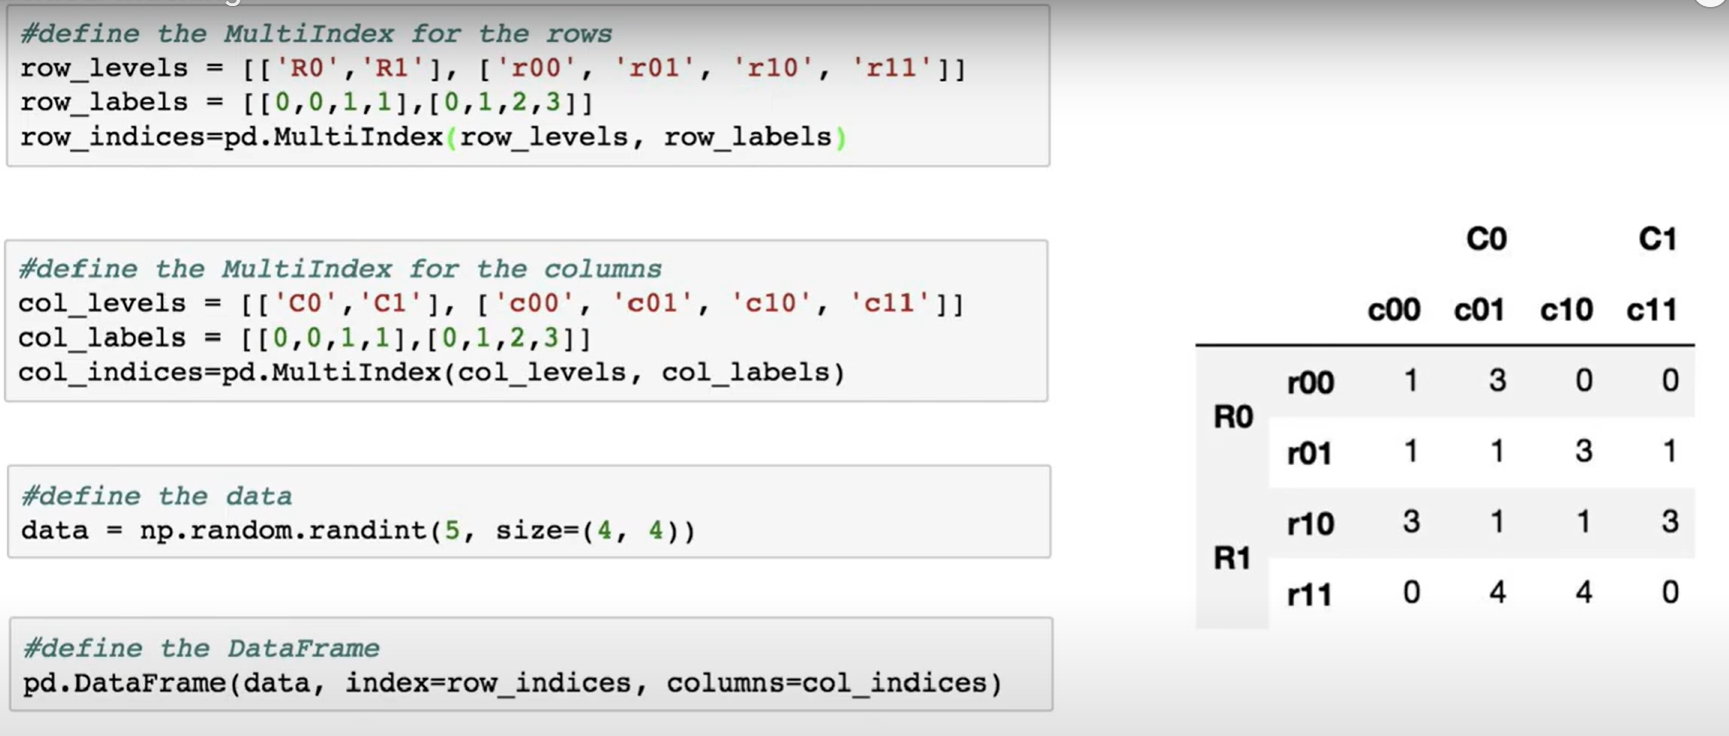

## 8. Stacking and unstacking 
In this unit, we will look at the stack() and unstack() functions of pandas. These functions are useful for DataFrames where we have multiple indexing. Their purpose is the following:

- the stack() function takes the innermost column label and turns it into the innermost row index. The overall effect is to make the DataFrame taller.
- the unstack() function is the inverse operation: it takes the innermost row index and turns it into the innermost column label. The overall effect is to make the DataFrame wider.


Let’s look at an example. Below, we define a DataFrame that has two levels of row indices and two levels of column labels. These are the same MultiIndex objects that we have seen in the video of the previous unit.

In [83]:
import pandas as pd
import numpy as np

# define the MultiIndex for the rows
row_levels = [["R0", "R1"], ["r00", "r01", "r10", "r11"]]
row_labels = [[0, 0, 1, 1], [0, 1, 2, 3]]
row_indices = pd.MultiIndex(row_levels, row_labels)

# define the MultiIndex for the columns
col_levels = [["C0", "C1"], ["c00", "c01", "c10", "c11"]]
col_labels = [[0, 0, 1, 1], [0, 1, 2, 3]]
col_indices = pd.MultiIndex(col_levels, col_labels)

# define the data
data = np.arange(16).reshape(4, 4)

# create the dataframe
df = pd.DataFrame(data, index=row_indices, columns=col_indices)
df

C0      C1    
       c00 c01 c10 c11
R0 r00   0   1   2   3
   r01   4   5   6   7
R1 r10   8   9  10  11
   r11  12  13  14  15

In [84]:
df.stack()

C0    C1
R0 r00 c00   0.0   NaN
       c01   1.0   NaN
       c10   NaN   2.0
       c11   NaN   3.0
   r01 c00   4.0   NaN
       c01   5.0   NaN
       c10   NaN   6.0
       c11   NaN   7.0
R1 r10 c00   8.0   NaN
       c01   9.0   NaN
       c10   NaN  10.0
       c11   NaN  11.0
   r11 c00  12.0   NaN
       c01  13.0   NaN
       c10   NaN  14.0
       c11   NaN  15.0

The innermost column level is [c00,c01,c10,c11]. So the stack() function took this level and turned it into an innermost row level. The resulting DataFrame has three levels of row indices and only one level of column indices. You can see that certain values are filled with NaN. This is because there were no entries in the original DataFrames at these indices. Take for example the entry at row index R0, r00, c00 and column index C1. This entry has a NaN because in the original DataFrame, there was no entry at column index C1,c00.

Let’s now try to unstack() instead:

In [85]:
df.unstack()

C0                                        C1                             \
    c00                  c01                  c10                   c11        
    r00  r01  r10   r11  r00  r01  r10   r11  r00  r01   r10   r11  r00  r01   
R0  0.0  4.0  NaN   NaN  1.0  5.0  NaN   NaN  2.0  6.0   NaN   NaN  3.0  7.0   
R1  NaN  NaN  8.0  12.0  NaN  NaN  9.0  13.0  NaN  NaN  10.0  14.0  NaN  NaN   

                
                
     r10   r11  
R0   NaN   NaN  
R1  11.0  15.0

We can see that this is in some sense the opposite. The innermost row level r00,r01,r10,r11 was now taken and turned into an innermost column level. So the new DataFrame has one row level and three column levels.

### Stacking and unstacking on different levels
In fact, pandas allows us to stack or unstack at any level of index, not just innermost, which is the default. To specify what level we want, use the level parameter. The outermost level is always level=0. Let’s try stacking the outermost level:

In [86]:
df.stack(level=0)

c00   c01   c10   c11
R0 r00 C0   0.0   1.0   NaN   NaN
       C1   NaN   NaN   2.0   3.0
   r01 C0   4.0   5.0   NaN   NaN
       C1   NaN   NaN   6.0   7.0
R1 r10 C0   8.0   9.0   NaN   NaN
       C1   NaN   NaN  10.0  11.0
   r11 C0  12.0  13.0   NaN   NaN
       C1   NaN   NaN  14.0  15.0

The outermost column index C0,C1 was taken and turned into the innermost row index. (Keep in mind we are operating on df, which has never changed.)

### Quiz
Consider the DataFrame df that we defined above. Which one of the following commands return back df?

In [87]:
df.stack().unstack()

C0                C1                
         c00   c01 c10 c11 c00 c01   c10   c11
R0 r00   0.0   1.0 NaN NaN NaN NaN   2.0   3.0
   r01   4.0   5.0 NaN NaN NaN NaN   6.0   7.0
R1 r10   8.0   9.0 NaN NaN NaN NaN  10.0  11.0
   r11  12.0  13.0 NaN NaN NaN NaN  14.0  15.0

In [88]:
df.stack().unstack().dropna(axis=1)

C0          C1      
         c00   c01   c10   c11
R0 r00   0.0   1.0   2.0   3.0
   r01   4.0   5.0   6.0   7.0
R1 r10   8.0   9.0  10.0  11.0
   r11  12.0  13.0  14.0  15.0

In [89]:
df.stack(level=0).unstack(level=0).dropna(axis=1)

Empty DataFrame
Columns: []
Index: [(r00, C0), (r00, C1), (r01, C0), (r01, C1), (r10, C0), (r10, C1), (r11, C0), (r11, C1)]

In [90]:
df.stack(level=0).unstack(level=0)

c00        c01        c10        c11      
         R0    R1   R0    R1   R0    R1   R0    R1
r00 C0  0.0   NaN  1.0   NaN  NaN   NaN  NaN   NaN
    C1  NaN   NaN  NaN   NaN  2.0   NaN  3.0   NaN
r01 C0  4.0   NaN  5.0   NaN  NaN   NaN  NaN   NaN
    C1  NaN   NaN  NaN   NaN  6.0   NaN  7.0   NaN
r10 C0  NaN   8.0  NaN   9.0  NaN   NaN  NaN   NaN
    C1  NaN   NaN  NaN   NaN  NaN  10.0  NaN  11.0
r11 C0  NaN  12.0  NaN  13.0  NaN   NaN  NaN   NaN
    C1  NaN   NaN  NaN   NaN  NaN  14.0  NaN  15.0

What you might have noticed while working through the quizzes above is that even though we can choose to stack or unstack at any level, the chosen index will always be moved to the last or innermost level of the other index. This is why after stacking the outermost level, we cannot obtain back our original DataFrame with any combination of stacking or unstacking. In order to achieve this, we would need to use an additional function.

Here is a possible solution. First, we call:

In [91]:
df.stack(level=0).unstack()

c00       c01     c10       c11      
          C0  C1    C0  C1  C0    C1  C0    C1
R0 r00   0.0 NaN   1.0 NaN NaN   2.0 NaN   3.0
   r01   4.0 NaN   5.0 NaN NaN   6.0 NaN   7.0
R1 r10   8.0 NaN   9.0 NaN NaN  10.0 NaN  11.0
   r11  12.0 NaN  13.0 NaN NaN  14.0 NaN  15.0

Now this is almost correct, except the two column levels are swapped. We can change this with the swaplevel() function as follows:

In [92]:
df.stack(level=0).unstack().swaplevel(axis=1)

C0  C1    C0  C1  C0    C1  C0    C1
         c00 c00   c01 c01 c10   c10 c11   c11
R0 r00   0.0 NaN   1.0 NaN NaN   2.0 NaN   3.0
   r01   4.0 NaN   5.0 NaN NaN   6.0 NaN   7.0
R1 r10   8.0 NaN   9.0 NaN NaN  10.0 NaN  11.0
   r11  12.0 NaN  13.0 NaN NaN  14.0 NaN  15.0

Finally we can drop the columns with missing entries. So the full command which returns back the original DataFrame is:

In [93]:
df.stack(level=0).unstack().swaplevel(axis=1).dropna(axis=1)

C0          C1      
         c00   c01   c10   c11
R0 r00   0.0   1.0   2.0   3.0
   r01   4.0   5.0   6.0   7.0
R1 r10   8.0   9.0  10.0  11.0
   r11  12.0  13.0  14.0  15.0

We end this unit with an observation that whenever possible, it is desirable to have the data as stacked as possible. This is because stacked data can often provide significant performance benefits when accessing the entries of a DataFrame.

## 9. Grouping 

### The split-apply-combine process
In the first course, you would have already seen the pandas groupby() function. This is an extremely powerful function that lets us slice, dice and summarize datasets. The general process in which we will use the groupby() function is what is known as a split-apply-combine procedure that consists of the following three steps:

- first, split the data into chunks
- then, apply different functions to each group
- finally, aggregate the results and combine them back into a DataFrame
The figure below shows an example:

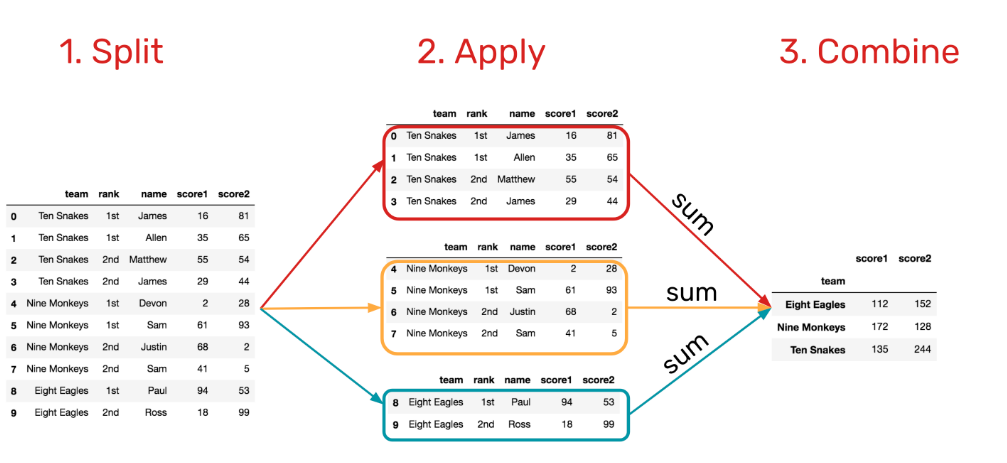

Let’s implement these steps three sets. We start by defining the DataFrame which you have seen before in this subject:

In [94]:
import pandas as pd
import numpy as np

raw_data = {'team': ['Ten Snakes', 'Ten Snakes', 'Ten Snakes', 'Ten Snakes', 
                     'Nine Monkeys', 'Nine Monkeys', 'Nine Monkeys', 'Nine Monkeys', 
                     'Eight Eagles', 'Eight Eagles'], 
        'rank': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '2nd'], 
        'name': ['James', 'Allen', 'Matthew', 'James', 'Devon', 'Sam', 'Justin', 'Sam', 'Paul', 'Ross'], 
        'score1': [16,35,55,29,2,61,68,41,94,18],
        'score2': [81,65,54,44,28,93,2,5,53,99]}
df = pd.DataFrame(raw_data, columns = ['team', 'rank', 'name', 'score1', 'score2'])

df

,team,rank,name,score1,score2
0,Ten Snakes,1st,James,16,81
1,Ten Snakes,1st,Allen,35,65
2,Ten Snakes,2nd,Matthew,55,54
3,Ten Snakes,2nd,James,29,44
4,Nine Monkeys,1st,Devon,2,28
5,Nine Monkeys,1st,Sam,61,93
6,Nine Monkeys,2nd,Justin,68,2
7,Nine Monkeys,2nd,Sam,41,5
8,Eight Eagles,1st,Paul,94,53
9,Eight Eagles,2nd,Ross,18,99


### Grouping by a single variable
The function groupby() essentially splits the data into different groups according to a variable of our choice. This variable can be one or more row indices or column labels. For our example, we will split by the column label ‘team’. Here is the command:

In [95]:
grouped = df.groupby("team")
grouped

An important thing to realize is that the variable grouped does not directly have the grouped data. Instead, this variable is now a DataFrameGroupBy object.

The way to think about this object is that it represents information about how the grouping will be done. There are several things we can do with this object. First, to have a look at what the grouping actually looks, like we can take the object grouped and pass it to the function list() as follows:


In [96]:
list(grouped)

[('Eight Eagles',
             team rank  name  score1  score2
  8  Eight Eagles  1st  Paul      94      53
  9  Eight Eagles  2nd  Ross      18      99),
 ('Nine Monkeys',
             team rank    name  score1  score2
  4  Nine Monkeys  1st   Devon       2      28
  5  Nine Monkeys  1st     Sam      61      93
  6  Nine Monkeys  2nd  Justin      68       2
  7  Nine Monkeys  2nd     Sam      41       5),
 ('Ten Snakes',
           team rank     name  score1  score2
  0  Ten Snakes  1st    James      16      81
  1  Ten Snakes  1st    Allen      35      65
  2  Ten Snakes  2nd  Matthew      55      54
  3  Ten Snakes  2nd    James      29      44)]

This lists all of the groups and the items in each group. We can also get some descriptive statistics by group, by calling the method describe() on our object grouped:

In [97]:
grouped.describe()

score1                                                   score2  \
              count   mean        std   min    25%   50%    75%   max  count   
team                                                                           
Eight Eagles    2.0  56.00  53.740115  18.0  37.00  56.0  75.00  94.0    2.0   
Nine Monkeys    4.0  43.00  29.631065   2.0  31.25  51.0  62.75  68.0    4.0   
Ten Snakes      4.0  33.75  16.235250  16.0  25.75  32.0  40.00  55.0    4.0   

                                                               
              mean        std   min    25%   50%    75%   max  
team                                                           
Eight Eagles  76.0  32.526912  53.0  64.50  76.0  87.50  99.0  
Nine Monkeys  32.0  42.292631   2.0   4.25  16.5  44.25  93.0  
Ten Snakes    61.0  15.853496  44.0  51.50  59.5  69.00  81.0

In [98]:
grouped.mean()

,score1,score2
team,,
Eight Eagles,56.00,76.0
Nine Monkeys,43.00,32.0
Ten Snakes,33.75,61.0


In [99]:
grouped.size()

team
Eight Eagles    2
Nine Monkeys    4
Ten Snakes      4
dtype: int64

In [100]:
# get the number of items in each group
grouped.count()

,rank,name,score1,score2
team,,,,
Eight Eagles,2,2,2,2
Nine Monkeys,4,4,4,4
Ten Snakes,4,4,4,4


If we want to get a specific group we call the get_group() function and pass it a group name. The groups are labeled according to the entries of the variable that we decided to group by:

In [101]:
grouped.get_group("Ten Snakes")

,team,rank,name,score1,score2
0,Ten Snakes,1st,James,16,81
1,Ten Snakes,1st,Allen,35,65
2,Ten Snakes,2nd,Matthew,55,54
3,Ten Snakes,2nd,James,29,44


### Grouping by multiple index levels
The hierarchical indexing we saw earlier is also where useful when grouping data. Let’s recreate the two-level index for the DataFrame above:



In [103]:
df2 = df.set_index(["team", "rank"])
df2

name  score1  score2
team         rank                         
Ten Snakes   1st     James      16      81
             1st     Allen      35      65
             2nd   Matthew      55      54
             2nd     James      29      44
Nine Monkeys 1st     Devon       2      28
             1st       Sam      61      93
             2nd    Justin      68       2
             2nd       Sam      41       5
Eight Eagles 1st      Paul      94      53
             2nd      Ross      18      99

In [106]:
grouped2 = df2.groupby(level=["team", "rank"])

In [107]:
grouped2.size()

team          rank
Eight Eagles  1st     1
              2nd     1
Nine Monkeys  1st     2
              2nd     2
Ten Snakes    1st     2
              2nd     2
dtype: int64

We can see that instead of having three groups as before, we now have six groups since inside each group, we split the data once again according to the two possible ranks.

We can access a certain group now by passing a tuple containing the two indices which define the group. For example:

In [108]:
grouped2.get_group(("Eight Eagles", "1st"))

,,name,score1,score2
team,rank,,,
Eight Eagles,1st,Paul,94,53


Let’s now look at the second step in the process, which is to apply a function to each of our groups.

### Applying a function
In the second step of the split-apply-combine process, we can now use our groups to apply a function of our choice on each group. We do this using the agg() function, and passing to it the function we wish to apply to each group. Let’s try summing the entries per group:

In [109]:
grouped.agg(np.sum)

,score1,score2
team,,
Eight Eagles,112,152
Nine Monkeys,172,128
Ten Snakes,135,244


In [110]:
grouped2.agg(np.sum)

score1  score2
team         rank                
Eight Eagles 1st       94      53
             2nd       18      99
Nine Monkeys 1st       63     121
             2nd      109       7
Ten Snakes   1st       51     146
             2nd       84      98

The final step now is to put the data back together.

### Filtering by groups
Once we have split the data and applied certain functions on each group separately, we arrive at the last part of the process, which is putting the data back together again. Now, the pandas GroupBy object has a very useful function called filter() which allows us to decide whether to include a certain group or not in the final combination.

This is how it works:

first, we define a function that when passed a group returns either True or False
and then, we pass this function to filter()
We will then get back the groups for which the function we defined returned True. Let’s try this on our example grouped. Suppose we are interested in keeping only those groups that have an average value greater than 50 in both score1 and score2. We already saw that we can get the average value in a group using the mean() method. This returns a DataFrame that has the mean values per group for each column. So we can define our function as follows:

In [112]:
def f(x):
    m = x.mean(numeric_only=True)
    return (m.score1 > 50) & (m.score2 > 50)
grouped.filter(f)

,team,rank,name,score1,score2
8,Eight Eagles,1st,Paul,94,53
9,Eight Eagles,2nd,Ross,18,99


The first thing to notice is that the object returned is a subset of the original DataFrame df. Next, observe that the rows returned are those from the team Eight Eagles. This is because this was the only group that satisfied our condition of having an average greater than 50 in both score1 and score2. In the next unit, you can test your understanding of grouping by completing a short exercise.

## 10. Exercise: Grouping and filtering
In this exercise, we will work with the DataFrame df2 from the previous unit:

In [113]:
df2

name  score1  score2
team         rank                         
Ten Snakes   1st     James      16      81
             1st     Allen      35      65
             2nd   Matthew      55      54
             2nd     James      29      44
Nine Monkeys 1st     Devon       2      28
             1st       Sam      61      93
             2nd    Justin      68       2
             2nd       Sam      41       5
Eight Eagles 1st      Paul      94      53
             2nd      Ross      18      99

We saw how to group the data by the two levels of indices:

In [115]:
grouped2 = df2.groupby(level=['team', 'rank'])

Your task is to now filter this data according to the following rule:

- a group is kept if and only if all the values of the group are greater than 50 in both score1 and score2.

In [126]:
def f(x):
    return (x.score1.min() > 50) and (x.score2.min() > 50)
grouped2.filter(f)

,,name,score1,score2
team,rank,,,
Eight Eagles,1st,Paul,94,53


NameError: name 'x' is not defined